2. Causal Forest (10 points)

In [1]:
import pandas as pd

# Ruta completa al archivo
path = r"C:\Users\Dafne\Documents\GitHub\CausalAI-Course\data\processed.cleveland.data"

# Asignar nombres de columnas según las instrucciones del profe
cols = ['age','sex','cp','restbp','chol','fbs','restecg','thalach',
        'exang','oldpeak','slope','ca','thal','hd']

# Leer el archivo
df = pd.read_csv(path, header=None, names=cols)

# Mostrar información básica
print("📄 Filas y columnas:", df.shape)
print("\n🔍 Primeras 5 filas:")
print(df.head())

print("\n📊 Tipos de datos detectados:")
print(df.dtypes)

print("\n🔎 Valores únicos en la variable 'hd':")
print(df['hd'].unique())


📄 Filas y columnas: (303, 14)

🔍 Primeras 5 filas:
    age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  hd  
0    3.0  0.0  6.0   0  
1    2.0  3.0  3.0   2  
2    2.0  2.0  7.0   1  
3    3.0  0.0  3.0   0  
4    1.0  0.0  3.0   0  

📊 Tipos de datos detectados:
age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

🔎 Valores únicos en la variable 'hd':

In [2]:
# --- 1️⃣ Limpieza de datos ---

# Convertir "?" en NaN y volver a detectar tipos
import numpy as np

df = df.replace("?", np.nan)

# Eliminar valores faltantes
df = df.dropna()

# Convertir las columnas ca y thal a numéricas
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)

# Crear variable binaria 'hd': 1 si tiene enfermedad, 0 si no
df['hd'] = (df['hd'] > 0).astype(int)

# Identificar variables categóricas
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Convertir categóricas a variables dummies
df = pd.get_dummies(df, columns=categorical, drop_first=True)

print("✅ Limpieza completa")
print("Dimensiones finales:", df.shape)
print("\nColumnas resultantes:\n", df.columns.tolist())


✅ Limpieza completa
Dimensiones finales: (297, 21)

Columnas resultantes:
 ['age', 'restbp', 'chol', 'thalach', 'oldpeak', 'hd', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0', 'exang_1.0', 'slope_2.0', 'slope_3.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']


Crear variable de tratamiento aleatoria

In [3]:
import numpy as np

# Fijar semilla para reproducibilidad
np.random.seed(123)

# Crear variable binaria T (tratamiento)
df['T'] = np.random.choice([0, 1], size=len(df))

# Verificar distribución
print(df['T'].value_counts(normalize=True))

# Mostrar primeras filas
df.head()


T
1    0.511785
0    0.488215
Name: proportion, dtype: float64


,age,restbp,chol,thalach,oldpeak,hd,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0,T
0,63.0,145.0,233.0,150.0,2.3,0,True,False,False,False,...,True,False,False,True,False,False,False,True,False,0
1,67.0,160.0,286.0,108.0,1.5,1,True,False,False,True,...,True,True,True,False,False,False,True,False,False,1
2,67.0,120.0,229.0,129.0,2.6,1,True,False,False,True,...,True,True,True,False,False,True,False,False,True,0
3,37.0,130.0,250.0,187.0,3.5,0,True,False,True,False,...,False,False,False,True,False,False,False,False,False,0
4,41.0,130.0,204.0,172.0,1.4,0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,0


In [5]:
import numpy as np

# Asegurar reproducibilidad
np.random.seed(123)

# Generar error aleatorio normal ~ N(0,1)
epsilon = np.random.normal(0, 1, len(df))

# Crear variable de resultado Y (mejora en salud cardiovascular)
df['Y'] = (1 + 0.05 * df['age'] + 0.3 * df['sex_1.0'] + 0.2 * df['restbp']) * df['T'] + 0.5 * df['oldpeak'] + epsilon

# Mostrar resumen estadístico
print(df['Y'].describe())




count    297.000000
mean      15.864977
std       15.188106
min       -2.681055
25%        0.634027
50%       23.275692
75%       30.037477
max       45.529768
Name: Y, dtype: float64


In [6]:
import statsmodels.api as sm

# Definir variable dependiente (Y)
Y = df['Y']

# Definir variable independiente (solo el tratamiento T)
X = sm.add_constant(df['T'])  # agrega el intercepto

# Ajustar el modelo OLS
ols_model = sm.OLS(Y, X).fit()

# Mostrar resumen
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     7384.
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          7.86e-211
Time:                        17:13:30   Log-Likelihood:                -744.92
No. Observations:                 297   AIC:                             1494.
Df Residuals:                     295   BIC:                             1501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6419      0.248      2.592      0.0

In [8]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Variables
Y = df['Y']
T = df['T']
X = df.drop(columns=['Y', 'T', 'hd'])

# Entrenamos el modelo
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=123,
    max_depth=None
)
rf.fit(pd.concat([X, T], axis=1), Y)

# Creamos dos escenarios: todos tratados (T=1) y todos no tratados (T=0)
X_treated = pd.concat([X, pd.Series(1, index=X.index, name='T')], axis=1)
X_control = pd.concat([X, pd.Series(0, index=X.index, name='T')], axis=1)

# Predicciones bajo ambos escenarios
y_pred_treated = rf.predict(X_treated)
y_pred_control = rf.predict(X_control)

# Efecto causal individual (heterogéneo)
df['treatment_effect'] = y_pred_treated - y_pred_control

# Efecto causal promedio (ATE)
ATE = df['treatment_effect'].mean()

print("🔹 Promedio del efecto causal estimado (ATE):", round(ATE, 3))
print("\n📊 Resumen de los efectos individuales:")
print(df['treatment_effect'].describe())



🔹 Promedio del efecto causal estimado (ATE): 30.045

📊 Resumen de los efectos individuales:
count    297.000000
mean      30.044913
std        4.125018
min       21.336955
25%       27.170492
50%       29.595918
75%       32.521530
max       43.023813
Name: treatment_effect, dtype: float64


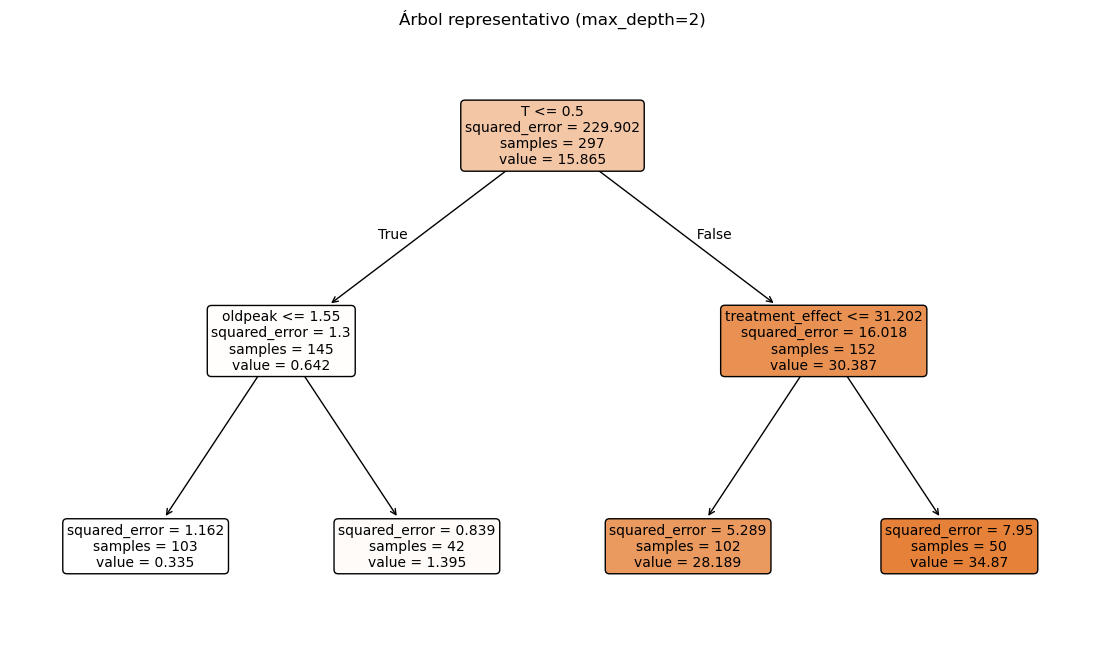

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Entrenamos un árbol de decisión con profundidad 2
tree = DecisionTreeRegressor(max_depth=2, random_state=123)
tree.fit(pd.concat([X, T], axis=1), Y)

# Graficamos el árbol
plt.figure(figsize=(14, 8))
plot_tree(tree,
          feature_names=list(X.columns) + ['T'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol representativo (max_depth=2)")
plt.show()
